  # $\color{green}{\text{ 1.7. Plotting with Python }}$

----

  # $\color{green}{\text{ Agenda: }}$

* Plotting with Pandas
* Plotting with Matplotlib.pyplot
* Plotting with Seaborn

------

### Why plotting? 


* Its easier to understand
* It's part of exploration 
* See a trend or insight
* Its a good tool to prsent on work
* To summarize the data, draw conclusion/ see some correlation

----

## Visualizing The Penguin Dataset

* New data set for  learning Data Science concepts: https://github.com/allisonhorst/palmerpenguins
        

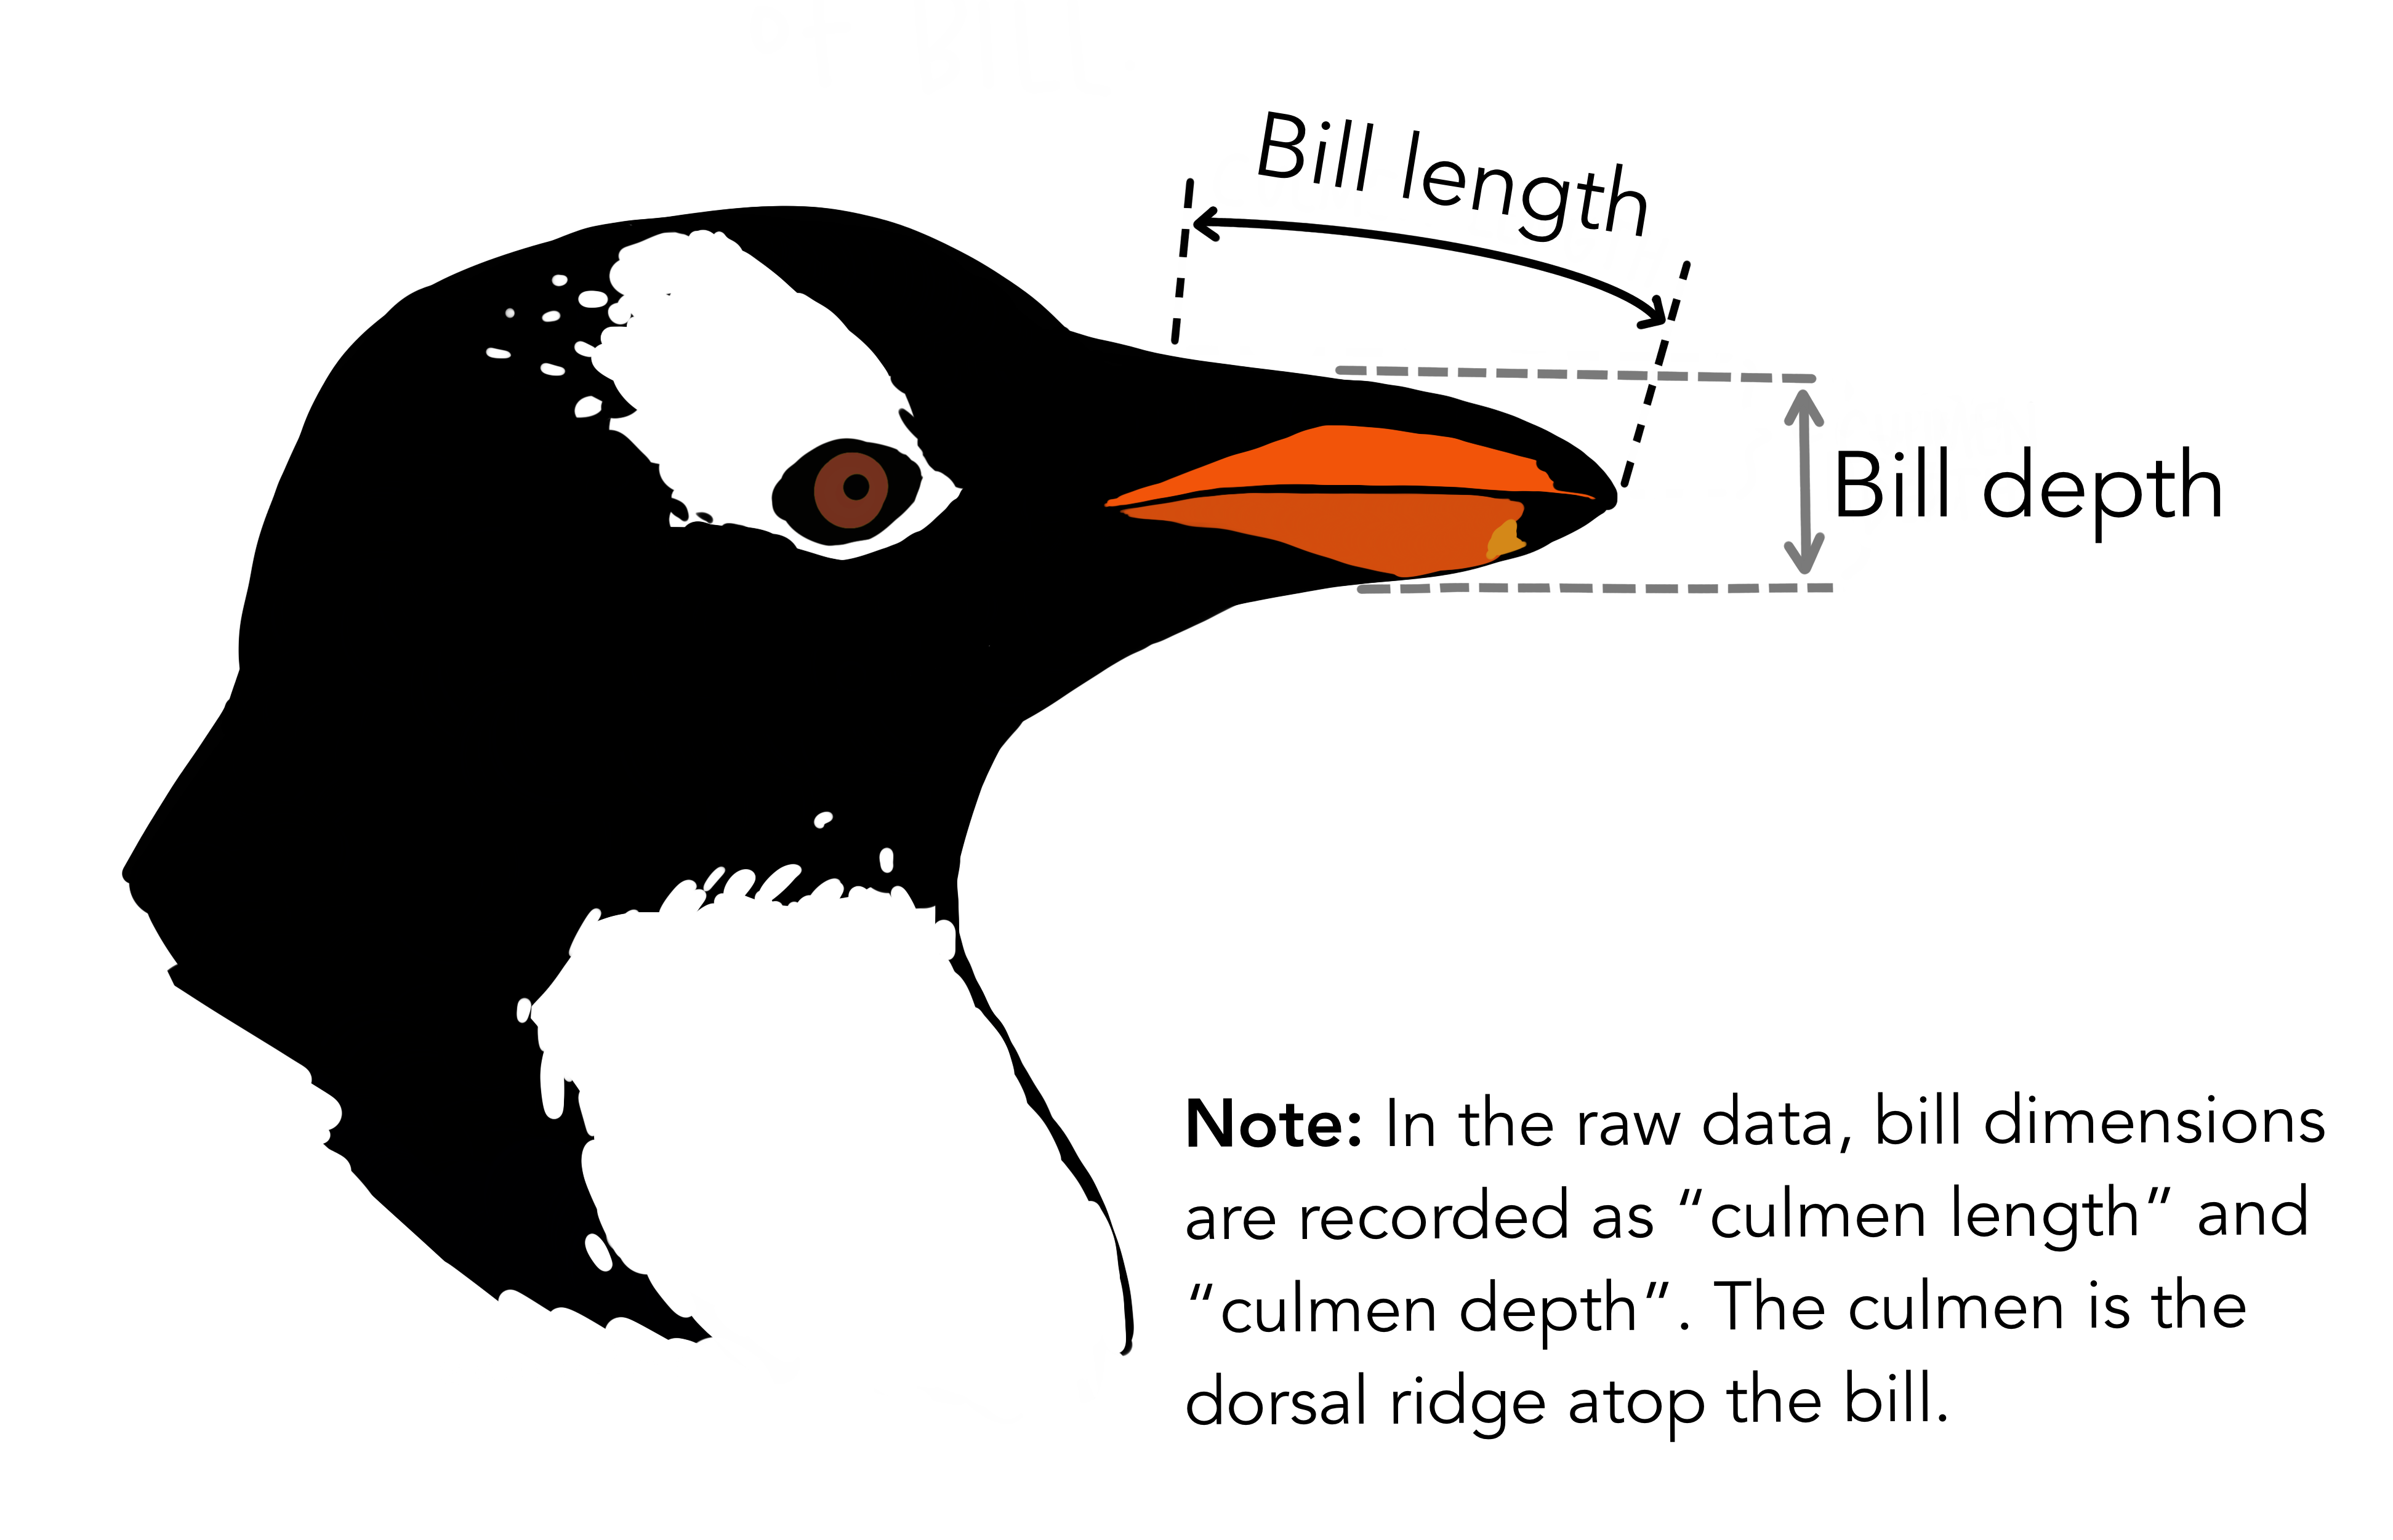

### Imports


In [39]:
#!pip install matplotlib
# !pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
%matplotlib inline  
# could be needed if you are using jupyter lab, vs code or some other editor


## 1. Plotting with pandas

- plotting with pandas is based on matplotlib, but you don't have to import plt extra
- plotting with pandas is super practical, because there are in build methods in your data frames
- plotting with pandas is limited, because you don't have all the possibilities if plots and configuration


* Read the data from afile

In [3]:
df = pd.read_csv('./plotting_data/penguins_simple.csv', sep=';')
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


* Inspect first 5 rows

In [5]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


* Inspect last 2 rows

In [6]:
df.tail(2)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE
332,Gentoo,49.9,16.1,213.0,5400.0,MALE


* Check the shape of the dataframe

In [7]:
df.shape

(333, 6)

* Check the informations about the columns(datatypes)

In [8]:
df.dtypes, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


(Species                 object
 Culmen Length (mm)     float64
 Culmen Depth (mm)      float64
 Flipper Length (mm)    float64
 Body Mass (g)          float64
 Sex                     object
 dtype: object,
 None)

* Count the number of missing values

In [9]:
df.isna().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

* Clean the columns in a dataframe

In [10]:
df.head(1)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE


In [ ]:
### Clean the columns

In [11]:
df.columns = [columns.lower() for columns in df.columns.values.tolist()]  #List Comprehension

In [12]:
df.columns = [columns.replace(" ", "_") for columns in df.columns.values.tolist()] #these are to make things easier to write

In [13]:
df.columns.values.tolist()

['species',
 'culmen_length_(mm)',
 'culmen_depth_(mm)',
 'flipper_length_(mm)',
 'body_mass_(g)',
 'sex']

### Let's try to answer following questions!

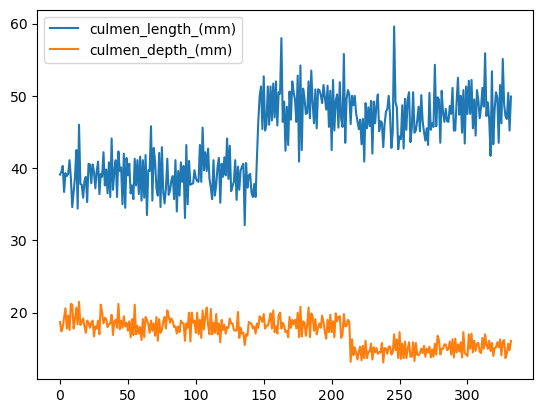

In [14]:
df[['culmen_length_(mm)', 'culmen_depth_(mm)']].plot(); #in pandas default is a line plot

#### 1. Do larger penguins have longer flippers?

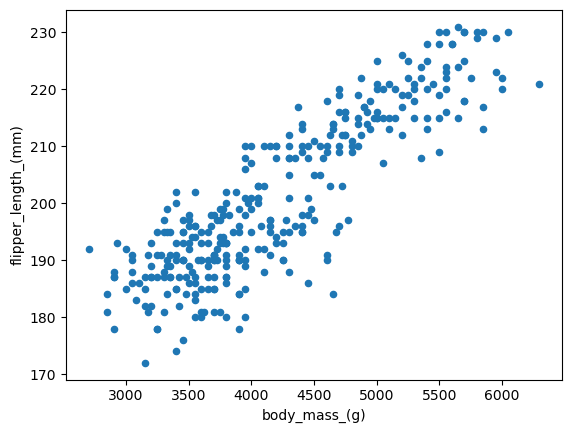

In [15]:
df.plot.scatter(x="body_mass_(g)", y="flipper_length_(mm)");



#### 2. Visualize the distribution of Culmen Length


In [ ]:
# we have multiple options: histogram, violin, kde (kernel density estimation), boxplot

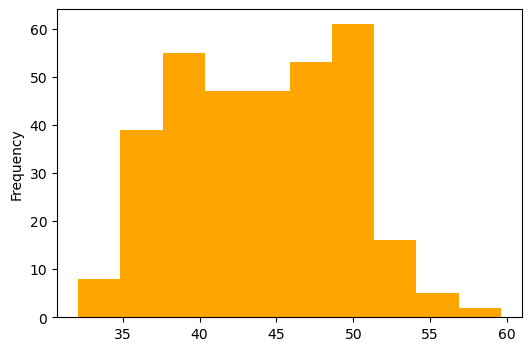

In [19]:
df['culmen_length_(mm)'].plot.hist(color="orange", bins=10, figsize=(6,4));  #Histogram



#### 3. Are male penguins heavier than female penguins?

In [ ]:
df.head()

In [ ]:
# selecting by conditions, plotting two in one, introducing alpha, histogram


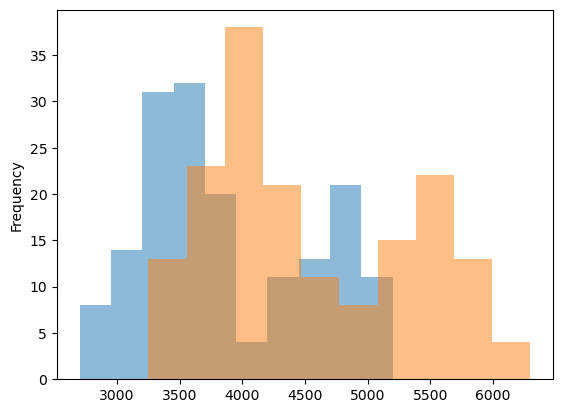

In [20]:
df["body_mass_(g)"].loc[df["sex"] == "FEMALE"].plot.hist(alpha=0.5); #first plot is blue by default in pandas, second is orange
df["body_mass_(g)"].loc[df["sex"] == "MALE"].plot.hist(alpha=0.5);



In [21]:
species_list = list(df['species'].unique())
species_list

['Adelie', 'Chinstrap', 'Gentoo']

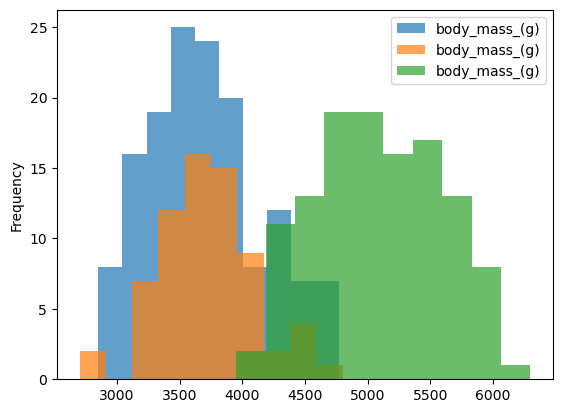

In [22]:
### A for loop
for species in species_list:
    df['body_mass_(g)'].loc[df['species'] == species].plot.hist(alpha=0.7)

plt.legend(loc=1); # 1234 on these are the 4 cornres, and its counter clockwise

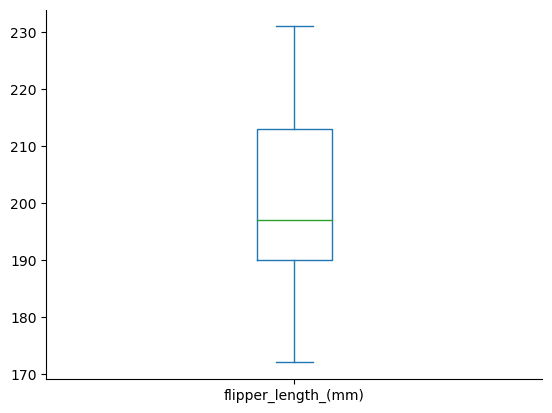

In [23]:
df['flipper_length_(mm)'].plot(kind='box');
sns.despine()

In [25]:
df['flipper_length_(mm)'].median()

197.0

In [26]:
df['flipper_length_(mm)'].min()

172.0

In [27]:
df['flipper_length_(mm)'].quantile([0.25,0.5,0.75])

0.25    190.0
0.50    197.0
0.75    213.0
Name: flipper_length_(mm), dtype: float64


### Other plots with pandas:
- Check the documentation here: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html


## 2. Plotting with Matplotlib

In [34]:

# print all available styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [29]:

# Call the function once in the beginning of your script/ notebook.
plt.style.use('ggplot') #ggplot is ugly, stick to default

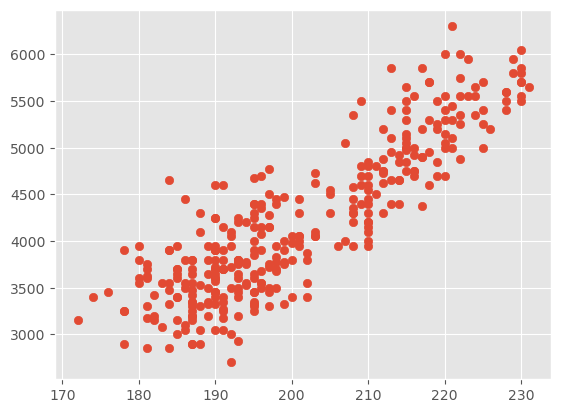

In [30]:
# or: plt.plot, plt.bar, plt.boxplot, plt.hist,... 
plt.scatter(df['flipper_length_(mm)'], df['body_mass_(g)'])  

plt.show()  # we need it in some other editors


### Add title and labels

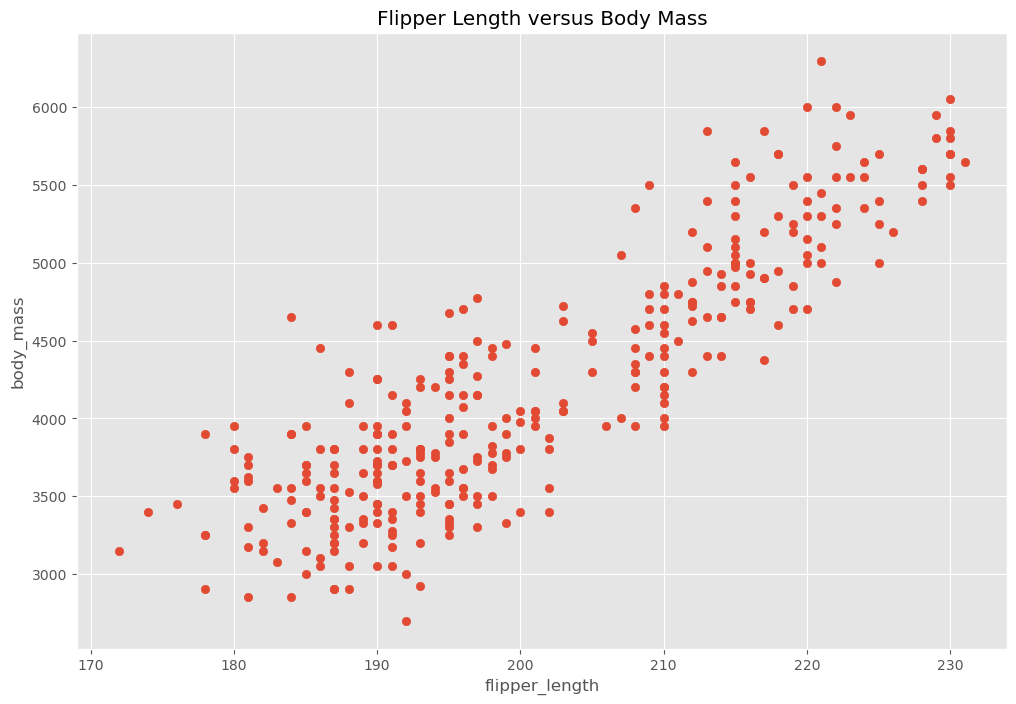

In [35]:
plt.figure(figsize=(12,8))  # always the first step, 12, 8 inches

plt.scatter(df['flipper_length_(mm)'], df['body_mass_(g)'])  

plt.xlabel('flipper_length')
plt.ylabel('body_mass')
plt.title( "Flipper Length versus Body Mass");

plt.show()

### More formatting

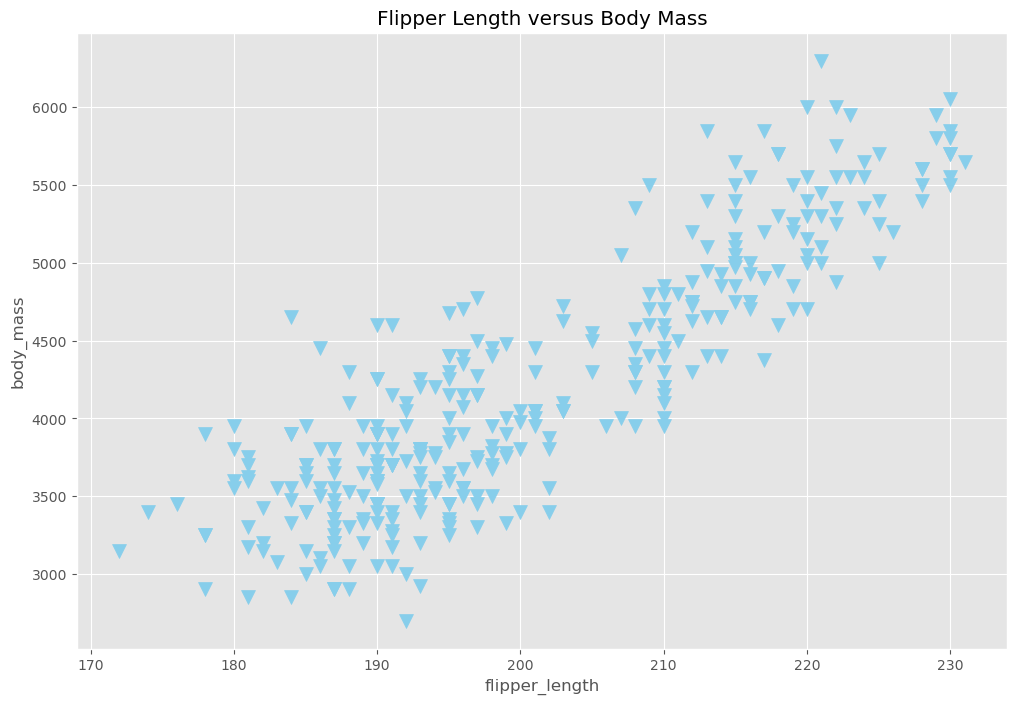

In [36]:
plt.figure(figsize=(12,8))  # always the first step, 12, 8 inches

plt.scatter(df['flipper_length_(mm)'], df['body_mass_(g)'], s=100, c="skyblue", marker="v")  

plt.xlabel('flipper_length')
plt.ylabel('body_mass')
plt.title( "Flipper Length versus Body Mass");

plt.show()


## Multiple plots in one

In [37]:
## Plot different species in different colors
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [38]:
## Filtering by species

df['body_mass_(g)'].loc[df['species'] == 'Gentoo']

214    4500.0
215    5700.0
216    4450.0
217    5700.0
218    5400.0
        ...  
328    4925.0
329    4850.0
330    5750.0
331    5200.0
332    5400.0
Name: body_mass_(g), Length: 119, dtype: float64

In [ ]:
df['flipper_length_(mm)'].loc[df['species'] == 'Gentoo']  

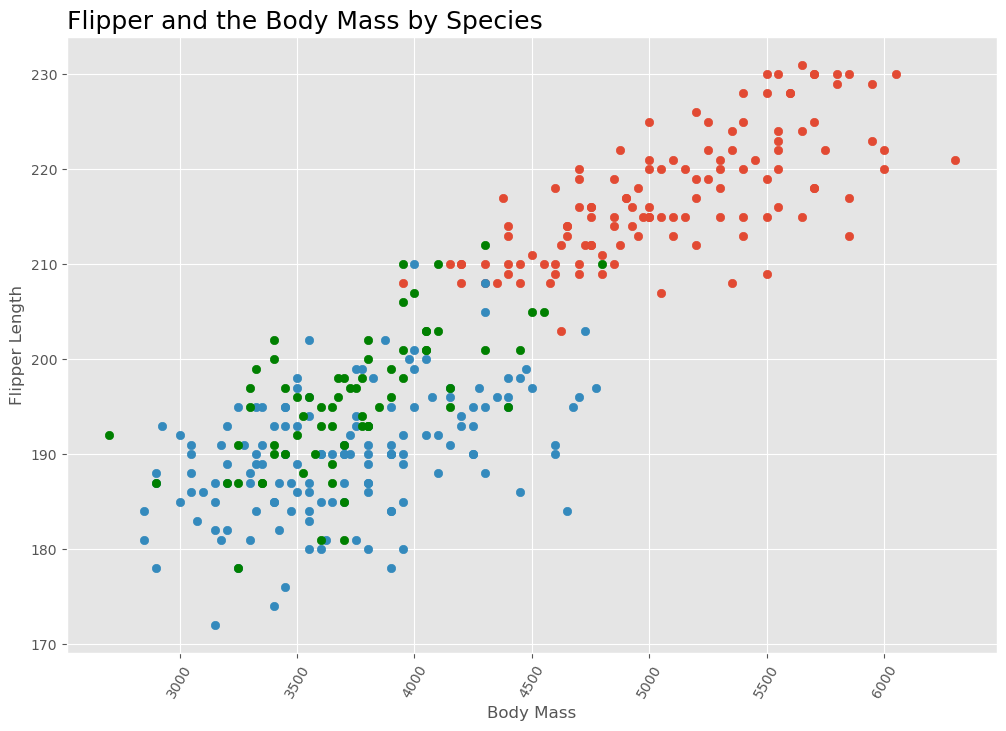

In [40]:
#set plot size
plt.figure(figsize= (12, 8))

#this could be a for loop
#plot first species

plt.scatter(df['body_mass_(g)'].loc[df['species'] == 'Gentoo'], df['flipper_length_(mm)'].loc[df['species'] == 'Gentoo'])

#plot second one
plt.scatter(df['body_mass_(g)'].loc[df['species'] == 'Adelie'], df['flipper_length_(mm)'].loc[df['species'] == 'Adelie'])


#plot third one

plt.scatter(df['body_mass_(g)'].loc[df['species'] == 'Chinstrap'], df['flipper_length_(mm)'].loc[df['species'] == 'Chinstrap'], c="green")



#plt title

plt.title("Flipper and the Body Mass by Species", fontsize=18, loc="left");

#annotate
plt.xlabel("Body Mass")
plt.ylabel("Flipper Length")


# rotate data ticks labels

plt.xticks(rotation=60);





## Save the plot on your hard disk, put it in the same cell as plot.

plt.savefig("plot.png")



# put in same cell as plot.

In [ ]:
# Or the same with the for loop

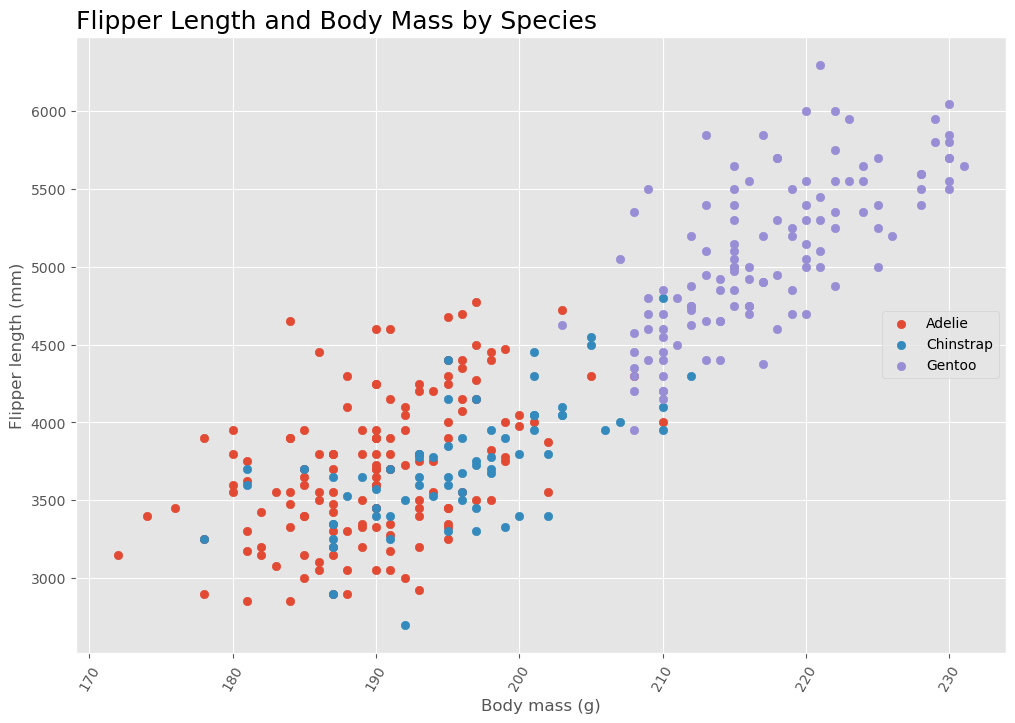

In [41]:
plt.figure(figsize= (12,8))
for species in species_list:
    plt.scatter(df.loc[df['species'] == species]['flipper_length_(mm)'],
                df.loc[df['species']==species]['body_mass_(g)'], label=species)

plt.title('Flipper Length and Body Mass by Species', fontsize=18, loc='left')
plt.xlabel('Body mass (g)')
plt.ylabel('Flipper length (mm)')
plt.xticks(rotation=60)
plt.legend(loc = "right")
plt.savefig('plot.png')
    
  


- Gallery: https://matplotlib.org/3.1.0/gallery/index.html

- Great youtube series on matplotlib: https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_

## 3. Plotting with Seaborn

- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics


* [The new objects interface](https://seaborn.pydata.org/tutorial/objects_interface.html)

In [42]:
import seaborn as sns

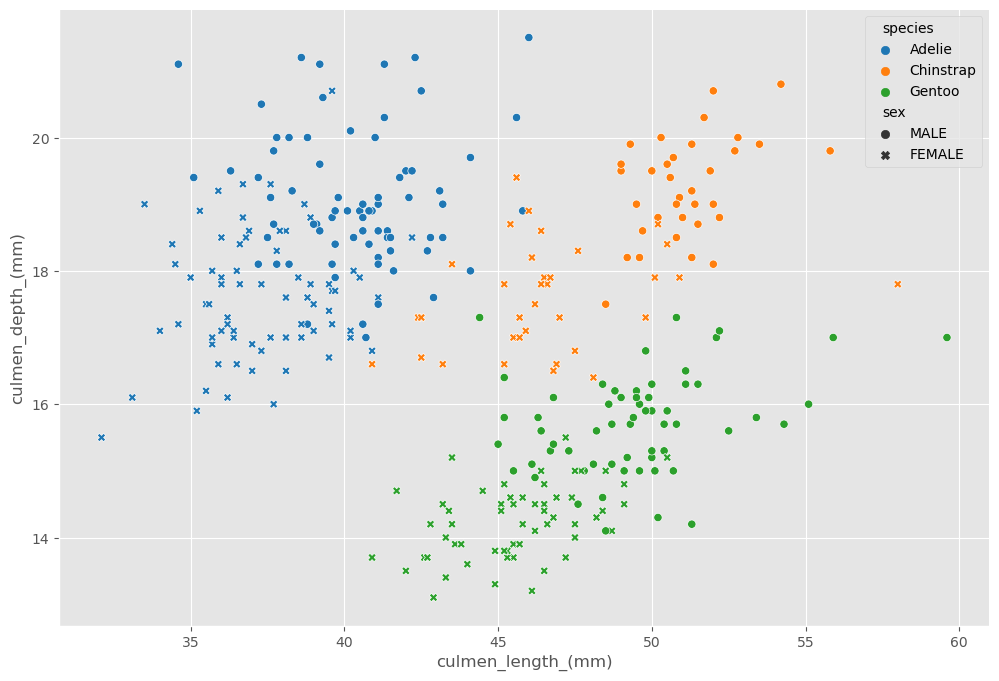

In [43]:
plt.figure(figsize= (12,8))

sns.scatterplot(data=df, x='culmen_length_(mm)', y='culmen_depth_(mm)', hue="species", palette="tab10", style="sex")

# color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html

sns.despine()


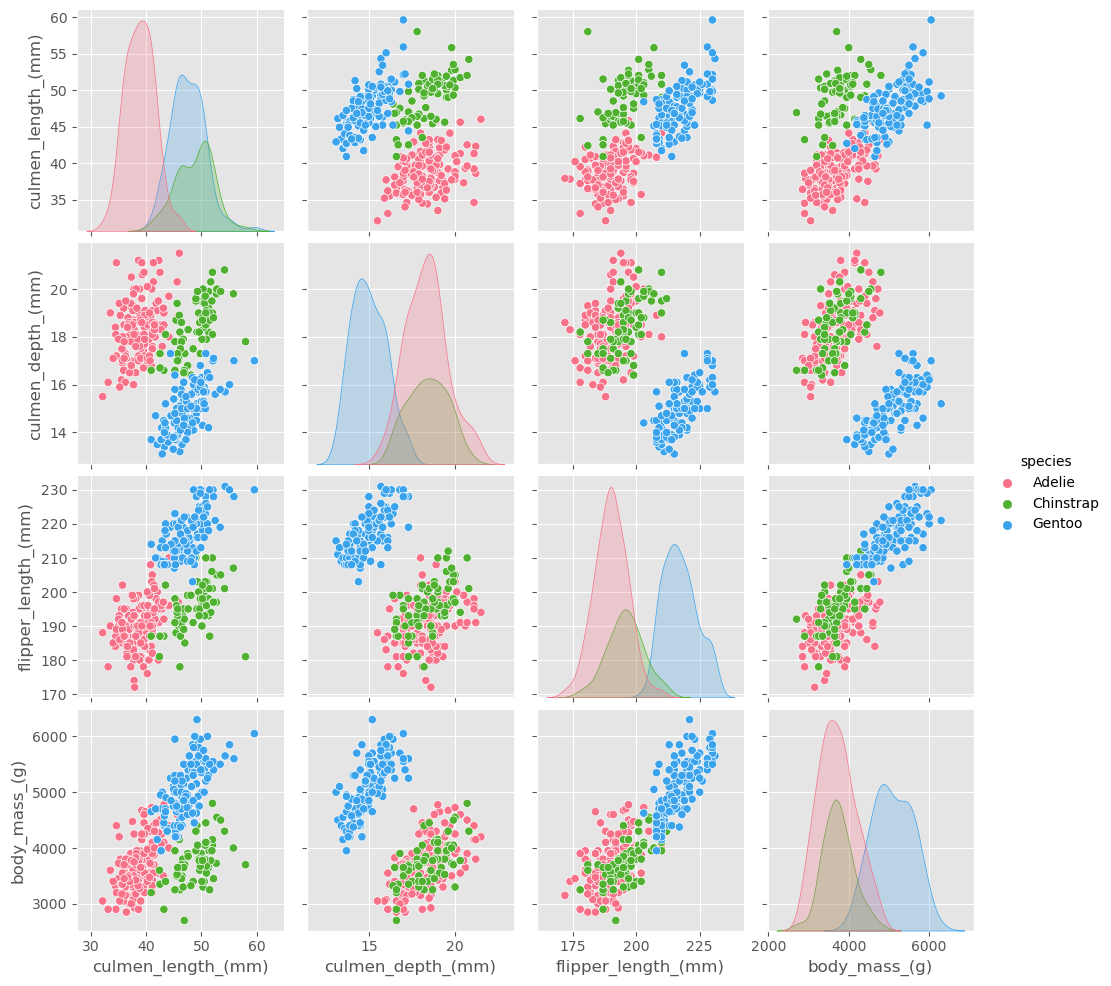

In [44]:
sns.pairplot(df, hue="species", palette="husl");

---

### How to use colors?



- https://academy.datawrapper.de/article/140-what-to-consider-when-choosing-colors-for-data-visualization 

- https://projects.susielu.com/viz-palette

----

## More advanced plotting
### Subplots
In matplotlib, the "figure" is like a container that holds plots (called "axes"). You can create a grid of plots, e.g. with two plots in one figure like this:

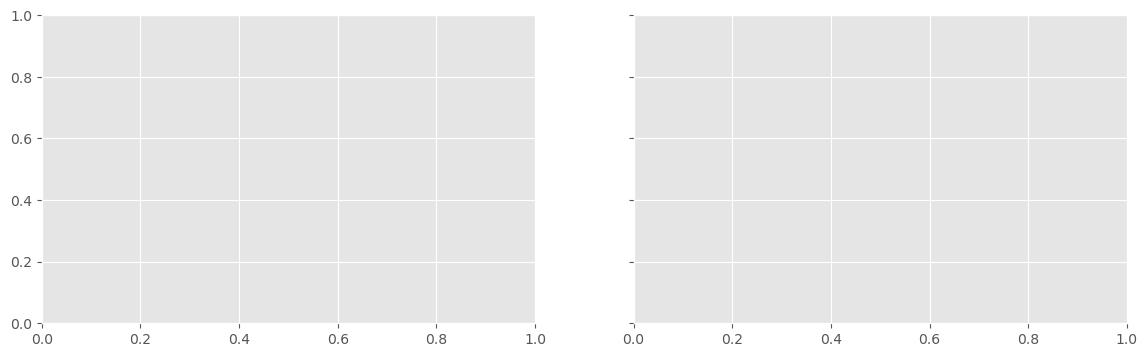

In [45]:
plt.subplots(nrows=1, ncols=2, figsize=(14,4), sharex=True, sharey=True);

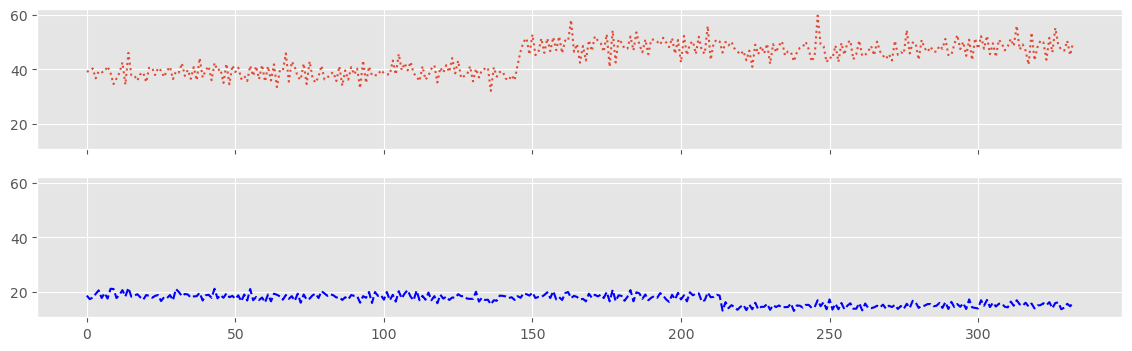

In [46]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(14,4), sharex=True, sharey=True) 

 
ax1.plot(df['culmen_length_(mm)'], linestyle=':')   #specifies first plot
ax2.plot(df['culmen_depth_(mm)'], color='blue', linestyle='--')     # specifies second plot

### References:

* [Matplotlib CheatSheet](https://towardsdatascience.com/matplotlib-cheat-sheet-f441c43971c4)

* [Plotting Inspirations](https://python-graph-gallery.com/)



## More Plotting libraries

- [Plotly](https://plotly.com/python/)
- [Bokeh](http://docs.bokeh.org/en/latest/)
- [Altair](https://altair-viz.github.io/)
- [Holoviews](https://holoviews.org/)
- [D3.js](https://d3js.org/)